In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt1, analyze_expt2

In [ ]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt1.get_categ_info()

trial_data_all1, subjects1, subject_cb1, cue_level_names, image_type_names = analyze_expt1.load_data()
trial_data_all2, subjects2, subject_cb2, cue_level_names, image_type_names = analyze_expt2.load_data()
 
n_subjects1 = len(subjects1)
n_subjects2 = len(subjects2)

n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_condition1, dprime_by_condition1, propyes_by_condition1, rt_by_condition1 = analyze_expt1.get_perf_by_cond()
acc_by_condition2, dprime_by_condition2, propyes_by_condition2, rt_by_condition2 = analyze_expt2.get_perf_by_cond()

acc_by_nat1, dprime_by_nat1, propyes_by_nat1, rt_by_nat1 = analyze_expt1.get_perf_by_nat()
acc_by_nat2, dprime_by_nat2, propyes_by_nat2, rt_by_nat2 = analyze_expt2.get_perf_by_nat()

In [22]:
cue_level_names = ['Fine','Coarse']
expt_names = ['Color expt','Grayscale expt']
kind_names = ['Artificial','Natural']
n_kinds = 2

In [3]:
n_subjects1, n_subjects2

(45, 36)

In [4]:
cue_level_colors = np.array([[130, 181, 216], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = np.array([-0.2, 0.2])
barwidth = xjitters[1]*2

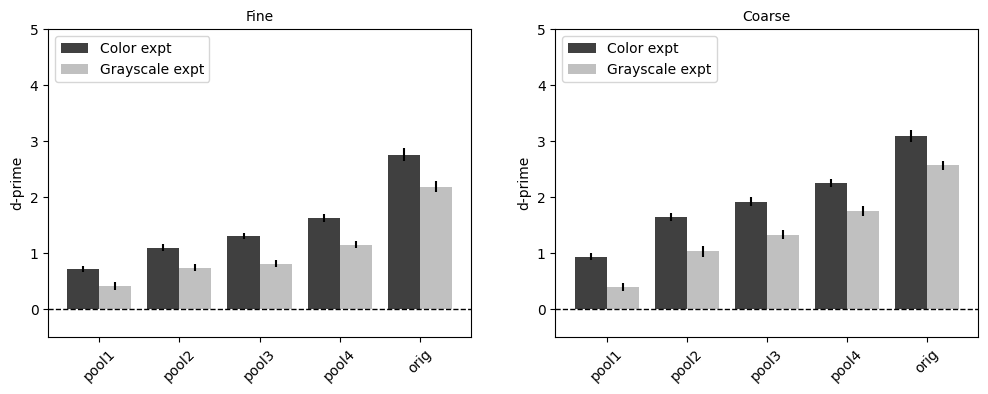

In [5]:
color_cond_colors = cm.gray(np.linspace(0,1,5))[[1,3],:]

plot_utils.set_all_font_sizes(10)

plt.figure(figsize=(12,4))

for cc, cue in enumerate(cue_level_names):

    
    ax = plt.subplot(1,2,cc+1)
    lh = []

    for ee, [dvals, svals] in enumerate(zip([dprime_by_condition1, dprime_by_condition2], \
                                               [subject_cb1, subject_cb2])):


        vals = dvals[:,cc,:]
        n_subs_plot = vals.shape[0]

        meanvals = np.mean(vals, axis=0)
        semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

        h = plt.bar(np.arange(n_image_types)+xjitters[ee], \
                meanvals, \
                color = color_cond_colors[ee,:], width=barwidth)
        plt.errorbar(np.arange(n_image_types)+xjitters[ee], \
                         meanvals, \
                         semvals, \
                         color = 'k', linestyle='none')
                        # color = color_cond_colors[ee,:])
        lh.append(h)

        plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


    plt.axhline(0.0, color='k',
            # color=[0.8, 0.8, 0.8],
            linestyle='--', linewidth=1)

    plt.ylim([-.5, 5.0])
    ax.legend(lh, expt_names, loc='upper left')

    plt.ylabel('d-prime')

    # plt.ylim([-1, 4])

    plt.title('%s'%(cue_level_names[cc]))
    

In [6]:
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols


In [7]:
var1, var2, var3 = 'cue_level','image_type','color_cond'
model_str = 'value ~ C(%s) + C(%s) + C(%s)'%(var1, var2, var3)
model_str += ' + C(%s):C(%s)'%(var1, var2)
model_str += ' + C(%s):C(%s)'%(var1, var3)
model_str += ' + C(%s):C(%s)'%(var2, var3)
model_str += ' + C(%s):C(%s):C(%s)'%(var1, var2, var3)
model_str += ' + 1'
model_str

'value ~ C(cue_level) + C(image_type) + C(color_cond) + C(cue_level):C(image_type) + C(cue_level):C(color_cond) + C(image_type):C(color_cond) + C(cue_level):C(image_type):C(color_cond) + 1'

In [8]:
atab = []

for ee, [dvals, svals] in enumerate(zip([dprime_by_condition1, dprime_by_condition2], \
                                           [subject_cb1, subject_cb2])):

    vals = dvals[:,:,:]

    for cc in range(n_cue_levels):
        for ii in range(n_image_types):
            for ss in range(vals.shape[0]):

                # [cue level, image type, color cond, value]
                atab.append([cc,ii,ee,vals[ss,cc,ii]])

df = pd.DataFrame(np.array(atab), columns=[var1, var2, var3,'value'])

model = ols(model_str, data = df).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(cue_level),1.0,35.602733,35.602733,139.758999,8.276276e-30
C(image_type),4.0,377.184649,94.296162,370.160828,1.979065e-179
C(color_cond),1.0,49.681549,49.681549,195.025576,8.982750e-40
C(cue_level):C(image_type),4.0,6.532542,1.633136,6.410895,4.443691e-05
C(cue_level):C(color_cond),1.0,0.606698,0.606698,2.381599,1.231723e-01
C(image_type):C(color_cond),4.0,0.407327,0.101832,0.399741,8.089053e-01
C(cue_level):C(image_type):C(color_cond),4.0,0.656898,0.164225,0.644666,6.307749e-01
Residual,790.0,201.247573,0.254744,NaN,NaN


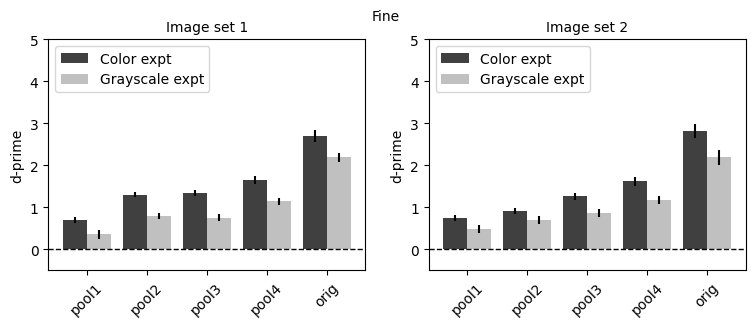

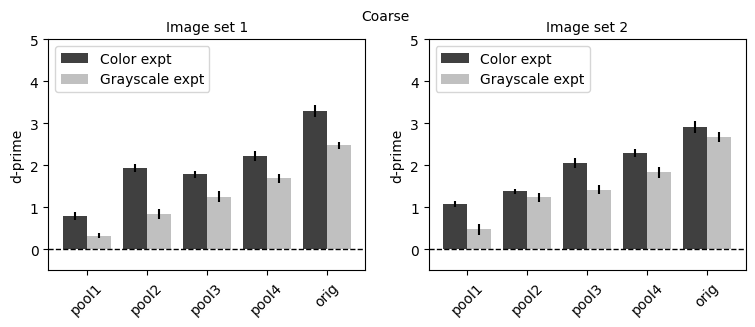

In [9]:
color_cond_colors = cm.gray(np.linspace(0,1,5))[[1,3],:]

plot_utils.set_all_font_sizes(10)

for cc, cue in enumerate(cue_level_names):

    plt.figure(figsize=(9,3))

    for cbi, cb in enumerate([1,2]):

        ax = plt.subplot(1,2,cb)
        lh = []

        for ee, [dvals, svals] in enumerate(zip([dprime_by_condition1, dprime_by_condition2], \
                                                   [subject_cb1, subject_cb2])):



            subjects_plot = (svals==cbi)
            n_subs_plot = np.sum(subjects_plot)

            
            

            vals = dvals[subjects_plot,cc,:]

#                 h = plt.plot(np.arange(n_image_types)+xjitters[cc], \
#                              vals.T,\
#                              point_types[cc],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
#                             markersize=markersize)
#                 lh.append(h[0])

            meanvals = np.mean(vals, axis=0)
            semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

            h = plt.bar(np.arange(n_image_types)+xjitters[ee], \
                             meanvals, width = barwidth, \
                        color = color_cond_colors[ee,:])
            plt.errorbar(np.arange(n_image_types)+xjitters[ee], \
                             meanvals, \
                             semvals, \
                             color='k', linestyle='none')
                            # color = color_cond_colors[ee,:])
            lh.append(h)

            plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


        # plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, expt_names, loc='upper left')

        plt.ylabel('d-prime')

        plt.axhline(0.0, color='k',
            # color=[0.8, 0.8, 0.8],
            linestyle='--', linewidth=1)

        plt.ylim([-.5, 5.0])

        plt.title('Image set %d'%(cb))
    
    plt.suptitle(cue_level_names[cc])
    

In [10]:
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols


In [11]:
var1, var2, var3 = 'cue_level','image_type','color_cond'
model_str = 'value ~ C(%s) + C(%s) + C(%s)'%(var1, var2, var3)
model_str += ' + C(%s):C(%s)'%(var1, var2)
model_str += ' + C(%s):C(%s)'%(var1, var3)
model_str += ' + C(%s):C(%s)'%(var2, var3)
model_str += ' + C(%s):C(%s):C(%s)'%(var1, var2, var3)
model_str += ' + 1'
model_str

'value ~ C(cue_level) + C(image_type) + C(color_cond) + C(cue_level):C(image_type) + C(cue_level):C(color_cond) + C(image_type):C(color_cond) + C(cue_level):C(image_type):C(color_cond) + 1'

In [13]:
a_all = []

for cbi, cb in enumerate([1,2]):
    
    atab = []

    for ee, [dvals, svals] in enumerate(zip([dprime_by_condition1, dprime_by_condition2], \
                                               [subject_cb1, subject_cb2])):
        
        subjects_plot = (svals==cbi)
        n_subs_plot = np.sum(subjects_plot)

        vals = dvals[subjects_plot,:,:]
        
        print(vals.shape)
        
        for cc in range(n_cue_levels):
            for ii in range(n_image_types):
                for ss in range(vals.shape[0]):
                
                    # [cue level, image type, color cond, value]
                    atab.append([cc,ii,ee,vals[ss,cc,ii]])
   
    df = pd.DataFrame(np.array(atab), columns=[var1, var2, var3,'value'])
    
    model = ols(model_str, data = df).fit()

    a = anova_lm(model)

    a_all.append(a)

(22, 2, 5)
(18, 2, 5)
(23, 2, 5)
(18, 2, 5)


In [14]:
cbi = 0;
print('Image set %d'%(cbi+1))
a_all[cbi]


Image set 1


,df,sum_sq,mean_sq,F,PR(>F)
C(cue_level),1.0,14.236655,14.236655,63.404348,1.969835e-14
C(image_type),4.0,195.304001,48.826000,217.451406,7.645721e-97
C(color_cond),1.0,34.697750,34.697750,154.529852,5.280805e-30
C(cue_level):C(image_type),4.0,3.165577,0.791394,3.524552,7.690595e-03
C(cue_level):C(color_cond),1.0,0.984258,0.984258,4.383490,3.695088e-02
C(image_type):C(color_cond),4.0,1.848682,0.462171,2.058322,8.565807e-02
C(cue_level):C(image_type):C(color_cond),4.0,1.297317,0.324329,1.444432,2.186697e-01
Residual,380.0,85.324259,0.224538,NaN,NaN


In [15]:
cbi = 1;
print('Image set %d'%(cbi+1))
a_all[cbi]


Image set 2


,df,sum_sq,mean_sq,F,PR(>F)
C(cue_level),1.0,21.714397,21.714397,81.113996,9.571899e-18
C(image_type),4.0,184.900779,46.225195,172.673933,6.088592e-85
C(color_cond),1.0,16.663015,16.663015,62.244591,3.089364e-14
C(cue_level):C(image_type),4.0,4.369941,1.092485,4.080972,2.976105e-03
C(cue_level):C(color_cond),1.0,0.010960,0.010960,0.040942,8.397563e-01
C(image_type):C(color_cond),4.0,1.328862,0.332216,1.240989,2.929614e-01
C(cue_level):C(image_type):C(color_cond),4.0,1.556596,0.389149,1.453664,2.156704e-01
Residual,390.0,104.403864,0.267702,NaN,NaN


#### Splitting into "natural/artificial" categories

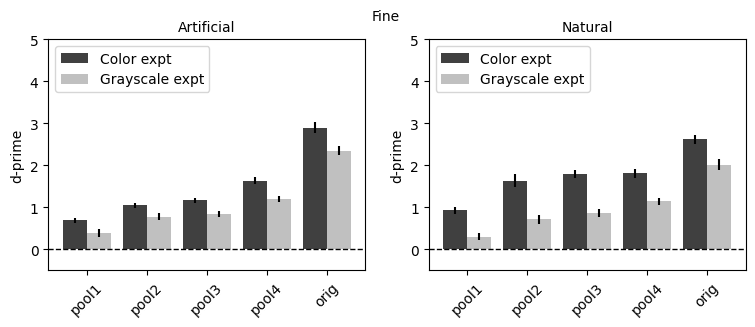

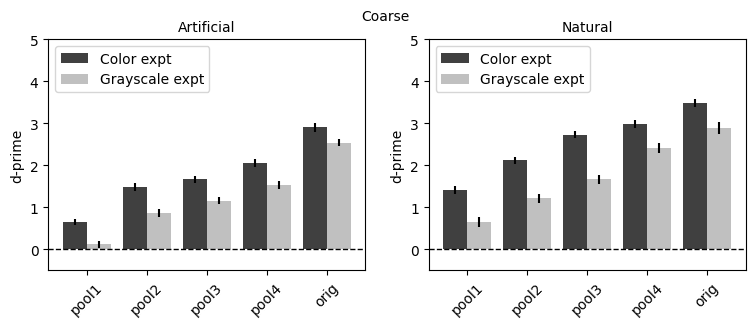

In [20]:
color_cond_colors = cm.gray(np.linspace(0,1,5))[[1,3],:]

plot_utils.set_all_font_sizes(10)

for cc, cue in enumerate(cue_level_names):

    plt.figure(figsize=(9,3))

    for kk in range(2):
        
        ax = plt.subplot(1,2,kk+1)
        lh = []

        for ee, dvals in enumerate([dprime_by_nat1, dprime_by_nat2]):

            vals = dvals[:,cc,:,kk]
            n_subs_plot = vals.shape[0]

            meanvals = np.mean(vals, axis=0)
            semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

            h = plt.bar(np.arange(n_image_types)+xjitters[ee], \
                             meanvals, width = barwidth, \
                        color = color_cond_colors[ee,:])
            plt.errorbar(np.arange(n_image_types)+xjitters[ee], \
                             meanvals, \
                             semvals, \
                             color='k', linestyle='none')
                            # color = color_cond_colors[ee,:])
            lh.append(h)

            plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


        # plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, expt_names, loc='upper left')

        plt.ylabel('d-prime')

        plt.axhline(0.0, color='k',
            # color=[0.8, 0.8, 0.8],
            linestyle='--', linewidth=1)

        plt.ylim([-.5, 5.0])

        plt.title('%s'%(kind_names[kk]))
    
    plt.suptitle(cue_level_names[cc])
    

#### three way anova: naturalness x image type x color 

In [26]:
var1, var2, var3 = 'naturalness','image_type','color_cond'
model_str = 'value ~ C(%s) + C(%s) + C(%s)'%(var1, var2, var3)
model_str += ' + C(%s):C(%s)'%(var1, var2)
model_str += ' + C(%s):C(%s)'%(var1, var3)
model_str += ' + C(%s):C(%s)'%(var2, var3)
model_str += ' + C(%s):C(%s):C(%s)'%(var1, var2, var3)
model_str += ' + 1'
model_str

a_all = []

for cc in [0,1]:
    
    atab = []
    
    for ee, dvals in enumerate([dprime_by_nat1, dprime_by_nat2]):
    
        vals = dvals[:,cc,:,:]
    
        for ii in range(n_image_types):
            for kk in range(n_kinds):
                for ss in range(vals.shape[0]):
    
                    # [cue level, image type, color cond, value]
                    atab.append([kk,ii,ee,vals[ss,ii,kk]])
    
    df = pd.DataFrame(np.array(atab), columns=[var1, var2, var3, 'value'])
    
    model = ols(model_str, data = df).fit()
    
    a = anova_lm(model)

    a_all.append(a)

In [27]:
cc = 0;

print('%s task'%cue_level_names[cc])

a_all[cc]

Fine task


,df,sum_sq,mean_sq,F,PR(>F)
C(naturalness),1.0,2.136765,2.136765,5.520263,1.904274e-02
C(image_type),4.0,322.714853,80.678713,208.430849,5.244269e-122
C(color_cond),1.0,62.475257,62.475257,161.402807,8.796782e-34
C(naturalness):C(image_type),4.0,10.649109,2.662277,6.877907,1.917412e-05
C(naturalness):C(color_cond),1.0,6.998246,6.998246,18.079743,2.371833e-05
C(image_type):C(color_cond),4.0,0.594387,0.148597,0.383895,8.202407e-01
C(naturalness):C(image_type):C(color_cond),4.0,2.436012,0.609003,1.573340,1.794391e-01
Residual,790.0,305.790548,0.387077,NaN,NaN


In [28]:
cc = 1;

print('%s task'%cue_level_names[cc])

a_all[cc]

Coarse task


,df,sum_sq,mean_sq,F,PR(>F)
C(naturalness),1.0,92.740048,92.740048,232.374170,3.464642e-46
C(image_type),4.0,459.193933,114.798483,287.644905,1.589295e-152
C(color_cond),1.0,83.085841,83.085841,208.184101,4.632433e-42
C(naturalness):C(image_type),4.0,5.623309,1.405827,3.522512,7.347862e-03
C(naturalness):C(color_cond),1.0,3.734546,3.734546,9.357469,2.295791e-03
C(image_type):C(color_cond),4.0,2.790024,0.697506,1.747707,1.375422e-01
C(naturalness):C(image_type):C(color_cond),4.0,1.420815,0.355204,0.890017,4.693304e-01
Residual,790.0,315.287356,0.399098,NaN,NaN
